# Day 2
In the excercise you can use a build in procedure for generating
random numbers. Compare the results obtained in simulations with
expected results. Use histograms (and tests).
1. Choose a value for the probability parameter p in the geometric
distribution and simulate 10,000 outcomes. You can experiment
with a small, moderate and large value if you like

In [15]:
import numpy as np

In [20]:
#random uniform distribution
p = 1/4
N = 10000
#set seed
np.random.seed(0)
#generate N uniform random numbers
U = np.random.rand(N)
X = np.ceil(np.log(1-U)/np.log(1-p))

In [23]:
X

array([3., 5., 4., ..., 5., 1., 6.])

## Exercise 2
Simulate the 6 point distribution with

In [27]:
ps = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16])
k = len(ps)

In [34]:
# CRUDE METHOD
def crude_method(U, ps):
    N = len(U)
    X = np.zeros(N)
    F = np.cumsum(ps)
    for i in range(N):
        X[i] = np.argmax(U[i] < F)
    return X

X_crude = crude_method(U, ps)
print(X_crude)

[5. 1. 3. ... 4. 2. 4.]


(array([0.1548, 0.1024, 0.126 , 0.0632, 0.2438, 0.3098]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

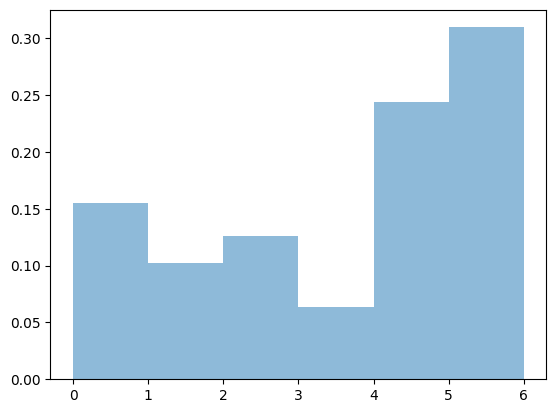

In [36]:
#plot histogram
import matplotlib.pyplot as plt
plt.hist(X_crude, bins=range(0, k+1), density=True, alpha=0.5, label='inverse transform')

# Rejection method

In [65]:
# REJECTION METHOD
def rejection_method(ps, N):

    c = np.max(ps)
    X = np.zeros(N)
    i = 0
    while i < N:
        U1 = np.random.rand()
        U2 = np.random.rand()
        I = int(np.floor(k*U1))
        if U2*c < ps[I]:
            X[i] = I
            i += 1
    return X

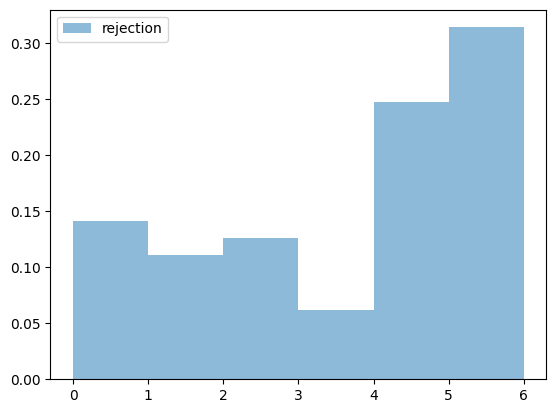

In [68]:
X_reject = rejection_method(ps, N)
#plotly plot of histograms
plt.hist(X_reject, bins=range(0, k+1), density=True, alpha=0.5, label='rejection')
plt.legend()
plt.show()

# Alias


In [121]:
def alias(ps, N):
    k = len(ps)
    L = np.arange(k)
    F = k * ps
    G = np.where(np.where(F >= 1, True, False))[0]
    S = np.where(np.where(F <= 1, True, False))[0]
    eps = 1e-3
    while len(S) > 0:
        i = G[0]
        j = S[0]
        L[j] = i
        F[i] = F[i] - (1-F[j])
        if F[i] < 1-eps:
            G = np.delete(G, 0)
            S = np.append(S, i)
        S = np.delete(S, 0)
    
    X = np.zeros(N)
    for i in range(N):
        U1 = np.random.rand()
        I = int(np.floor(k*U1))
        U2 = np.random.rand()
        if U2 <= F[I]:
            X[i] = I
        else:
            X[i] = L[I]
    return X

(array([0.1528, 0.1032, 0.1212, 0.0658, 0.2452, 0.3118]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

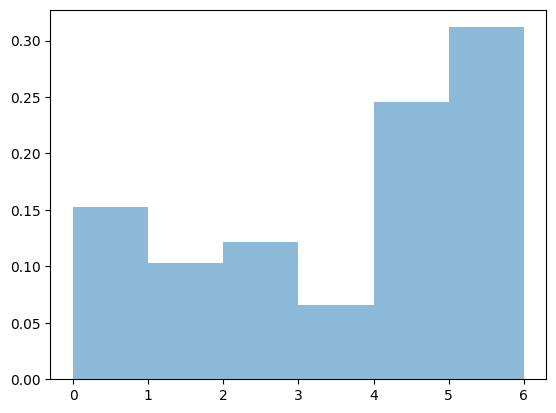

In [122]:
X = alias(ps, N)
plt.hist(X, bins=range(0, k+1), density=True, alpha=0.5, label='alias')

In [112]:
G

array([4, 5], dtype=int64)